# Random Forests

Wie der Name nahelegt bestehen 'Random Forests' aus mehreren 'Trees'. Angelehnt an Bootstrapping methoden werden mehrere Modelle auf unterschiedlichen Datensampeln gelernt. Bei der Vorhersage wird dann der Durchschnitt der Vorhersagen verwendet. Mit dieser Methode versucht man die Varianz der Vorhersage zu reduzieren. 

Der Durchschnitt von $N$ unabhängig identisch verteilten Zufallsvariablen mit einer Varianz von $\sigma^2$ ist $\frac{1}{N}\sigma^2$. Wenn wir keine Unabhängigkeit annehmen können und eine paarweise positive Korrelation $\rho$ vorliegt, dann ist die Varianz von dem Durchschnitt:

$$\rho\sigma^2 + \frac{1-\rho}{N}\sigma^2$$

In diesem Fall ist die Idee mehrere Bäume auf

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.ensemble import RandomForestRegressor 

import graphviz 

/Users/maddosz/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("../../data/housing/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Nehmen wir nur die Ortskoordinaten als Eingabe $X$ für das KNR-Modell und den 'median_house_value' als Ausgabevariable $Y$, können wir durch Anpassen des Parameters $k$ sehen wie eine größer Wahl der Nachbarschaft ein Glättung des 'Bildes' entspricht. 

In [3]:
max_depth = 3
n_estimators = 5

dForest = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
dForest.fit(data[['latitude', 'longitude']], data['median_house_value'])
data['predicted_value'] = dForest.predict(data[['latitude', 'longitude']])

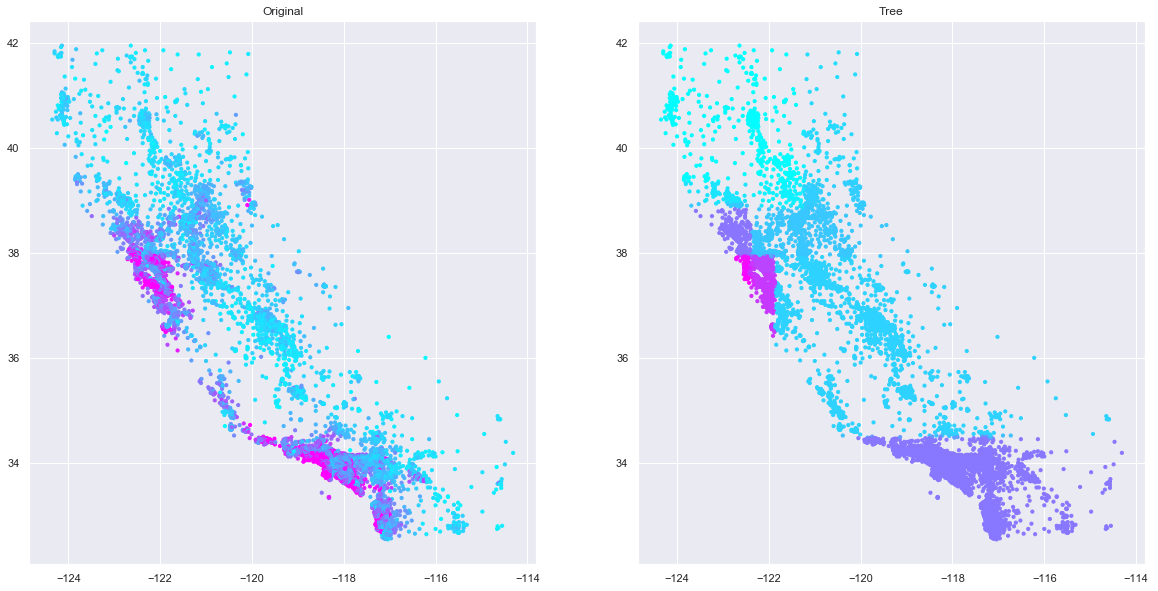

In [4]:
fig = plt.figure(figsize=(20,10))
sub1 = plt.subplot(1,2,1)
sub1.set_title('Original')
plt.scatter(x=data['longitude'], y=data['latitude'], c=data['median_house_value'], s=10, cmap='cool');

sub2=plt.subplot(1,2,2)
sub2.set_title('Tree')
plt.scatter(x=data['longitude'], y=data['latitude'], c=data['predicted_value'], s=10, cmap='cool');

In [5]:
dForest.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1360597971, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1225939119, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=88509003, splitter='best'),
 DecisionTreeRegressor(criteri